<a href="https://colab.research.google.com/github/svarunkishore/Adaptive_Cyber_Defence_System/blob/main/PCA_Reduction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your dataset
file_path = '/content/DataSet (1).csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Check the data types of columns
print(df.dtypes)

# Identify and handle categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_encoded)

# Perform PCA
pca = PCA(n_components=50)  # Reduce to 2 dimensions for visualization
data_reduced = pca.fit_transform(data_scaled)

# Create a DataFrame for the reduced data
df_reduced = pd.DataFrame(data_reduced, columns=['Principal Component 1', 'Principal Component 2'])

# Plot the reduced data
plt.figure(figsize=(10, 6))
plt.scatter(df_reduced['Principal Component 1'], df_reduced['Principal Component 2'], cmap='viridis')
plt.title('PCA: Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Display the reduced data in tabular form
print("Reduced Data:")
print(df_reduced.head())


android.permission.ACCESS_ALL_DOWNLOADS                    int64
android.permission.ACCESS_BLUETOOTH_SHARE                  int64
android.permission.ACCESS_CACHE_FILESYSTEM                 int64
android.permission.ACCESS_CHECKIN_PROPERTIES               int64
android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY     int64
                                                           ...  
android.permission.READ_INTERNAL_STORAGE                   int64
android.permission.INSTALL_SHORTCUT                        int64
android.permission.ENABLE_KEYGUARD                         int64
android.permission.RECORD_VIDEO                            int64
class                                                     object
Length: 389, dtype: object


ValueError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your dataset
file_path = '/content/DataSet (1).csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Check the data types of columns
print(df.dtypes)

# Identify and handle categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_encoded)

# Perform PCA
pca = PCA(n_components=50)  # Reduce to 2 dimensions for visualization
data_reduced = pca.fit_transform(data_scaled)

# Create a DataFrame for the reduced data
df_reduced = pd.DataFrame(data_reduced, columns=['Principal Component 1', 'Principal Component 2'])

# Find the actual column name for the target variable
target_variable_column = df.columns[-1]  # Assumes the target variable is the last column
# If the target variable is not the last column, you may need to adjust this line

# Concatenate the reduced features with the target variable
df_final = pd.concat([df[[target_variable_column]], df_reduced], axis=1)

# Plot the reduced data
# Plot the reduced data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_reduced['Principal Component 1'], df_reduced['Principal Component 2'], c=pd.Categorical(df[target_variable_column]).codes, cmap='viridis')
plt.title('PCA: Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=range(len(df[target_variable_column].unique())), label=target_variable_column)
plt.show()


# Display the reduced data in tabular form
print("Reduced Data:")
print(df_final.head())

# Save the new dataset to a CSV file
df_final.to_csv('new_dataset.csv', index=False)


android.permission.ACCESS_ALL_DOWNLOADS                    int64
android.permission.ACCESS_BLUETOOTH_SHARE                  int64
android.permission.ACCESS_CACHE_FILESYSTEM                 int64
android.permission.ACCESS_CHECKIN_PROPERTIES               int64
android.permission.ACCESS_CONTENT_PROVIDERS_EXTERNALLY     int64
                                                           ...  
android.permission.READ_INTERNAL_STORAGE                   int64
android.permission.INSTALL_SHORTCUT                        int64
android.permission.ENABLE_KEYGUARD                         int64
android.permission.RECORD_VIDEO                            int64
class                                                     object
Length: 389, dtype: object


ValueError: ignored

In [ ]:
import pandas as pd
print("Dataset without PCA")
# Load the dataset
file_path = '/content/DataSet (1).csv'
df = pd.read_csv(file_path)

# Get the shape (number of rows and columns) of the dataset
shape = df.shape
print("Dataset Shape (rows, columns):", shape)

# Get the size (total number of elements) of the dataset
size = df.size
print("Dataset Size (total elements):", size)
print("********************************************************************************************")

print("Dataset with PCA")
# Load the dataset
file_path = '/content/new_dataset1 (1).csv'
df = pd.read_csv(file_path)

# Get the shape (number of rows and columns) of the dataset
shape = df.shape
print("Dataset Shape (rows, columns):", shape)

# Get the size (total number of elements) of the dataset
size = df.size
print("Dataset Size (total elements):", size)


Dataset without PCA
Dataset Shape (rows, columns): (496, 389)
Dataset Size (total elements): 192944
********************************************************************************************
Dataset with PCA
Dataset Shape (rows, columns): (496, 51)
Dataset Size (total elements): 25296


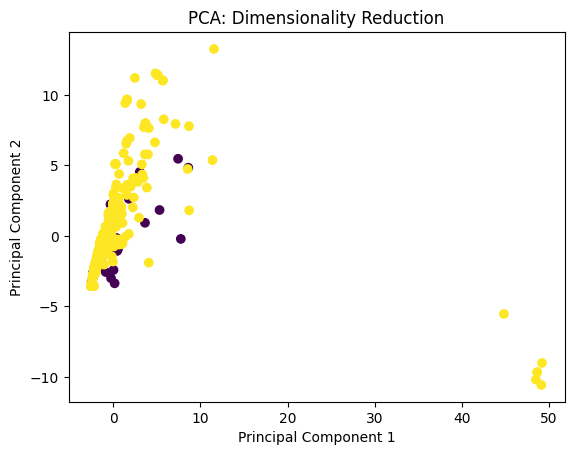

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

file_path = '/content/DataSet (1).csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Separate features (X) and target variable (y), if applicable
X = df.drop('class', axis=1)  # Adjust 'target_variable' to the name of your target column
y = df['class']

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
n_components = 150
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the reduced data
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Convert class labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Concatenate the reduced features with the encoded target variable
df_final = pd.concat([df_pca, pd.Series(y_encoded, name='Encoded_Target')], axis=1)

# Visualize the reduced data
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=y_encoded, cmap='viridis')
plt.title('PCA: Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
# Assuming df_final is the DataFrame with the reduced features and encoded target variable
df_final.to_csv('new_dataset1111.csv', index=False)



In [ ]:
# Assuming df_final is the DataFrame with the reduced features and encoded target variable
df_final.to_csv('/content/new_dataset1.csv', index=False)
